In [1]:
import vaex
import pandas as pd
import numpy as np

In [2]:
vaex_df=vaex.open('newCSV.csv')
#vaex_df_complementar=vaex.open('newCSV.csv')
#vaex_df = vaex_df.concat(vaex_df_complementar)

In [3]:
vaex_df.head()

#,testId,sampleNo,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
0,0,0,-1.47483,9.33739,-3.26569,-8.85052,-5.28062,-7.13918,59.9426,-20.9013,55.9461,FOL
1,0,1,-1.40779,9.23204,-3.1795,-1.175,0.742812,0.0332922,60.4064,-21.3224,55.7445,FOL
2,0,2,-1.89621,9.36612,-3.12204,-1.17683,0.753197,0.0406225,61.4374,-21.194,55.3112,FOL
3,0,3,-1.74298,9.19373,-3.26569,-1.20188,0.726319,0.0302378,62.5032,-22.1221,54.8453,FOL
4,0,4,-1.10133,9.24162,-2.96881,-1.14568,0.728457,0.0375682,63.58,-23.0839,54.34,FOL
5,0,5,-1.77171,9.1267,-3.32315,-1.58794,0.778853,0.0568105,64.6602,-24.0126,53.8006,FOL
6,0,6,-2.18351,9.01178,-4.2521,-1.24067,0.764498,0.0687223,65.6994,-25.0051,53.2114,FOL
7,0,7,-2.13563,8.73405,-4.15633,-1.2483,0.745256,0.0723875,66.7655,-26.0085,52.6059,FOL
8,0,8,-2.17394,8.41801,-4.30956,-1.26724,0.700357,0.0922407,67.8356,-27.0231,51.9865,FOL
9,0,9,-2.20267,8.5904,-4.52025,-1.16492,0.578795,0.0888809,68.9405,-28.0673,51.3657,FOL


In [4]:
vaex_df.tail()

#,testId,sampleNo,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
0,626,809,-9.05008,1.12049,-3.87861,0.0137445,0.00916298,-0.00152716,38.1141,-172.005,-65.1788,SDL
1,626,810,-9.02135,1.12049,-3.8403,0.00946841,0.00549779,-0.000305433,38.12,-172.007,-65.2084,SDL
2,626,811,-9.05008,1.13964,-3.82115,0.00702495,-0.0116064,0.00274889,38.1345,-172.011,-65.2458,SDL
3,626,812,-9.0405,1.13964,-3.81157,-0.00549779,-0.0146608,0.00458149,38.1252,-172.023,-65.2845,SDL
4,626,813,-9.02135,1.15879,-3.82115,-0.00824668,-0.00916298,0.0018326,38.1225,-172.041,-65.3122,SDL
5,626,814,-9.0405,1.13006,-3.77326,-0.00427606,-0.00641408,0.00274889,38.1237,-172.055,-65.328,SDL
6,626,815,-9.0405,1.10133,-3.79242,-0.00641408,0.000916298,0.0131336,38.1381,-172.06,-65.3282,SDL
7,626,816,-9.08839,1.05345,-3.83072,-0.0100793,-0.00488692,0.00763582,38.1466,-172.061,-65.3274,SDL
8,626,817,-9.13627,1.0726,-3.81157,-0.0146608,-0.00763582,0.00946841,38.1476,-172.066,-65.326,SDL
9,626,818,-9.1267,1.11091,-3.81157,-0.0161879,-0.0229074,-0.000305433,38.146,-172.08,-65.3311,SDL


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2023-05-17 23:43:29.122216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


In [6]:
activities = vaex_df['label'].value_counts().index
activities

Index(['STD', 'WAL', 'JOG', 'JUM', 'FKL', 'BSC', 'FOL', 'SDL', 'STN', 'STU',
       'SCH', 'CSI', 'CSO'],
      dtype='object')

In [7]:
vaex_df.info()

column,type,unit,description,expression
testId,int64,,,
sampleNo,int64,,,
acc_x,float64,,,
acc_y,float64,,,
acc_z,float64,,,
gyro_x,float64,,,
gyro_y,float64,,,
gyro_z,float64,,,
azimuth,float64,,,
pitch,float64,,,


In [8]:
df = vaex_df.drop(['testId', 'sampleNo']).copy()
#df = vaex_df.copy()
df.head()

#,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
0,-1.47483,9.33739,-3.26569,-8.85052,-5.28062,-7.13918,59.9426,-20.9013,55.9461,FOL
1,-1.40779,9.23204,-3.1795,-1.175,0.742812,0.0332922,60.4064,-21.3224,55.7445,FOL
2,-1.89621,9.36612,-3.12204,-1.17683,0.753197,0.0406225,61.4374,-21.194,55.3112,FOL
3,-1.74298,9.19373,-3.26569,-1.20188,0.726319,0.0302378,62.5032,-22.1221,54.8453,FOL
4,-1.10133,9.24162,-2.96881,-1.14568,0.728457,0.0375682,63.58,-23.0839,54.34,FOL
5,-1.77171,9.1267,-3.32315,-1.58794,0.778853,0.0568105,64.6602,-24.0126,53.8006,FOL
6,-2.18351,9.01178,-4.2521,-1.24067,0.764498,0.0687223,65.6994,-25.0051,53.2114,FOL
7,-2.13563,8.73405,-4.15633,-1.2483,0.745256,0.0723875,66.7655,-26.0085,52.6059,FOL
8,-2.17394,8.41801,-4.30956,-1.26724,0.700357,0.0922407,67.8356,-27.0231,51.9865,FOL
9,-2.20267,8.5904,-4.52025,-1.16492,0.578795,0.0888809,68.9405,-28.0673,51.3657,FOL


In [9]:
df['label'].value_counts()



STD    247228
WAL    244962
JOG     72025
JUM     71544
FKL     61387
BSC     60698
FOL     59599
SDL     57275
STN     45804
STU     44921
SCH     26089
CSI     25525
CSO     25236
dtype: int64

In [10]:
STD = df[df['label']=='STD'].head(25236).copy()
WAL = df[df['label']=='WAL'].head(25236).copy()
JOG = df[df['label']=='JOG'].head(25236).copy()
JUM = df[df['label']=='JUM'].head(25236).copy()
FKL = df[df['label']=='FKL'].head(25236).copy()
BSC = df[df['label']=='BSC'].head(25236).copy()
FOL = df[df['label']=='FOL'].head(25236).copy()
SDL = df[df['label']=='SDL'].head(25236).copy()
STN = df[df['label']=='STN'].head(25236).copy()
STU = df[df['label']=='STU'].head(25236).copy()
SCH = df[df['label']=='SCH'].head(25236).copy()
CSI = df[df['label']=='CSI'].head(25236).copy()
CSO = df[df['label']=='CSO'].head(25236).copy()




balanced_data = STD.concat (WAL)
act=[JOG, JUM, FKL, BSC, FOL, SDL, STN, STU, SCH,CSI,CSO]
for i in act:
    balanced_data=balanced_data.concat(i)
balanced_data

#,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
0,1.2641385,9.825804,0.89064306,0.01985312,-0.08124508,0.09132435,-0.0,0.0,-0.0,STD
1,1.1587936,9.720459,1.0821792,3.6117408,0.7467828,0.026267206,262.94513,24.800438,7.4588037,STD
2,1.0726024,9.672575,1.13964,-1.1688906,0.75991637,0.032070424,130.12677,-26.83192,-55.92275,STD
3,1.043872,9.653421,1.0726024,-1.196685,0.77488256,0.03604105,161.32631,-36.71792,-23.217781,STD
4,1.0534488,9.710882,1.1013328,-1.1850786,0.72356987,0.029626964,167.596,-40.598434,-15.124714,STD
...,...,...,...,...,...,...,...,...,...,...
"328,063",0.39264908,9.921572,-0.48841715,-1.6441438,0.48258355,0.7837401,193.42041,-73.22567,16.18915,CSO
"328,064",0.45010993,9.9790325,-0.4405331,-1.9004018,0.35521814,0.5656612,193.37619,-73.27729,15.707984,CSO
"328,065",0.49799395,10.01734,-0.45010993,-2.0570886,0.105068825,0.3472769,193.34671,-73.188156,15.273481,CSO
"328,066",0.58418524,10.103531,-0.31603462,-2.1444426,-0.095294975,0.112399206,193.27759,-72.995415,14.861524,CSO


In [11]:
balanced_data['label'].value_counts()

BSC    25236
JOG    25236
FKL    25236
JUM    25236
STD    25236
WAL    25236
STU    25236
SCH    25236
FOL    25236
STN    25236
SDL    25236
CSO    25236
CSI    25236
dtype: int64

In [12]:
balanced_data.info()

In [ ]:
array_label=balanced_data['label'].to_numpy()
array_label

array(['STD', 'STD', 'STD', ..., 'CSO', 'CSO', 'CSO'], dtype=object)

In [ ]:
lab = LabelEncoder()
label_En = lab.fit_transform(array_label)
print(label_En)


[9 9 9 ... 2 2 2]


In [ ]:
lab.classes_

array(['BSC', 'CSI', 'CSO', 'FKL', 'FOL', 'JOG', 'JUM', 'SCH', 'SDL',
       'STD', 'STN', 'STU', 'WAL'], dtype=object)

In [ ]:
df_label=pd.DataFrame(label_En,columns=['labels'])
df_label

,labels
0,9
1,9
2,9
3,9
4,9
...,...
328063,2
328064,2
328065,2
328066,2


In [ ]:
df_En = vaex.from_pandas(df_label)# converting pandas to vaex to combine with original data which already in vaex
df_En

#,labels
0,9
1,9
2,9
3,9
4,9
...,...
"328,063",2
"328,064",2
"328,065",2
"328,066",2


In [ ]:
#df_out = balanced_data.concat(df_En)
df_out = vaex.concat([balanced_data, df_En])
df_out.head()

#,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label,labels
0,1.26414,9.8258,0.890643,0.0198531,-0.0812451,0.0913243,-0,0,-0,STD,--
1,1.15879,9.72046,1.08218,3.61174,0.746783,0.0262672,262.945,24.8004,7.4588,STD,--
2,1.0726,9.67258,1.13964,-1.16889,0.759916,0.0320704,130.127,-26.8319,-55.9228,STD,--
3,1.04387,9.65342,1.0726,-1.19668,0.774883,0.036041,161.326,-36.7179,-23.2178,STD,--
4,1.05345,9.71088,1.10133,-1.18508,0.72357,0.029627,167.596,-40.5984,-15.1247,STD,--
5,1.10133,9.79707,1.11091,-1.12246,0.809396,0.0568105,165.768,-43.9206,-16.4852,STD,--
6,1.16837,9.77792,1.12049,-1.25838,0.791681,0.0653626,168.01,-45.7374,-14.5996,STD,--
7,1.22583,9.63427,1.21625,-1.25594,0.784656,0.0766636,170.338,-46.9569,-13.3513,STD,--
8,1.0726,9.63427,1.24498,-1.25655,0.781602,0.102931,172.963,-47.8036,-12.3563,STD,--
9,1.1971,9.63427,1.31202,-1.23822,0.715018,0.124922,175.826,-48.3391,-11.752,STD,--


In [ ]:
df_out['labels']

Expression = labels
Length: 656,136 dtype: int64 (column)
-------------------------------------
     0  --
     1  --
     2  --
     3  --
     4  --
   ...    
656131   2
656132   2
656133   2
656134   2
656135   2

In [ ]:
X = balanced_data[['acc_x', 'acc_y', 'acc_z','gyro_x','gyro_y','gyro_z','azimuth','pitch','roll']]
y = df_En

y['labels']

Expression = labels
Length: 328,068 dtype: int64 (column)
-------------------------------------
     0  9
     1  9
     2  9
     3  9
     4  9
   ...   
328063  2
328064  2
328065  2
328066  2
328067  2

In [ ]:


scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = X
scaled_X['label'] = y['labels'].values
#scaled_X = vaex.from_pandas(scaled_X)


scaled_X.head()

#,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
0,1.26414,9.8258,0.890643,0.0198531,-0.0812451,0.0913243,-0,0,-0,9
1,1.15879,9.72046,1.08218,3.61174,0.746783,0.0262672,262.945,24.8004,7.4588,9
2,1.0726,9.67258,1.13964,-1.16889,0.759916,0.0320704,130.127,-26.8319,-55.9228,9
3,1.04387,9.65342,1.0726,-1.19668,0.774883,0.036041,161.326,-36.7179,-23.2178,9
4,1.05345,9.71088,1.10133,-1.18508,0.72357,0.029627,167.596,-40.5984,-15.1247,9
5,1.10133,9.79707,1.11091,-1.12246,0.809396,0.0568105,165.768,-43.9206,-16.4852,9
6,1.16837,9.77792,1.12049,-1.25838,0.791681,0.0653626,168.01,-45.7374,-14.5996,9
7,1.22583,9.63427,1.21625,-1.25594,0.784656,0.0766636,170.338,-46.9569,-13.3513,9
8,1.0726,9.63427,1.24498,-1.25655,0.781602,0.102931,172.963,-47.8036,-12.3563,9
9,1.1971,9.63427,1.31202,-1.23822,0.715018,0.124922,175.826,-48.3391,-11.752,9


In [ ]:
import scipy.stats as stats
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 9

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        acc_x = df['acc_x'].values[i: i + frame_size]
        acc_y = df['acc_y'].values[i: i + frame_size]
        acc_z = df['acc_z'].values[i: i + frame_size]
        gyro_x = df['gyro_x'].values[i: i + frame_size]
        gyro_y = df['gyro_y'].values[i: i + frame_size]
        gyro_z = df['gyro_z'].values[i: i + frame_size]
        azimuth = df['azimuth'].values[i: i + frame_size]
        pitch = df['pitch'].values[i: i + frame_size]
        roll = df['roll'].values[i: i + frame_size] 
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([acc_x, acc_y, acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)



X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((6560, 80, 9), (1640, 80, 9))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 9), (80, 9))

In [ ]:
X_train = X_train.reshape(6560, 80, 9, 1)
X_test = X_test.reshape(1640, 80, 9, 1)

In [ ]:

X_train[0].shape, X_test[0].shape


((80, 9, 1), (80, 9, 1))

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.2))



model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(13, activation='softmax'))

2023-05-17 22:33:41.565082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 22:33:41.567625: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data= (X_test, y_test), verbose=1)

Epoch 1/30
 95/205 [============>.................] - ETA: 18s - loss: 1.8892 - accuracy: 0.3526

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

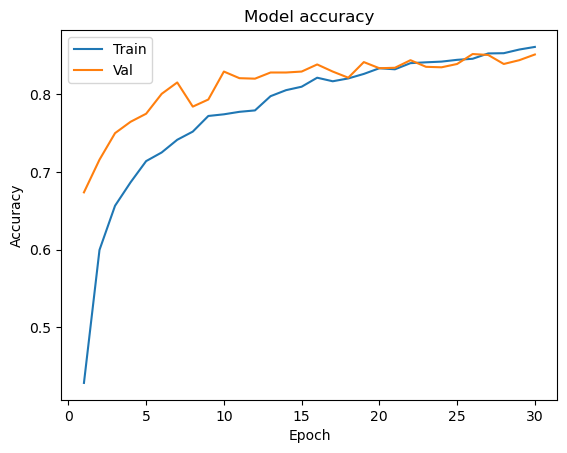

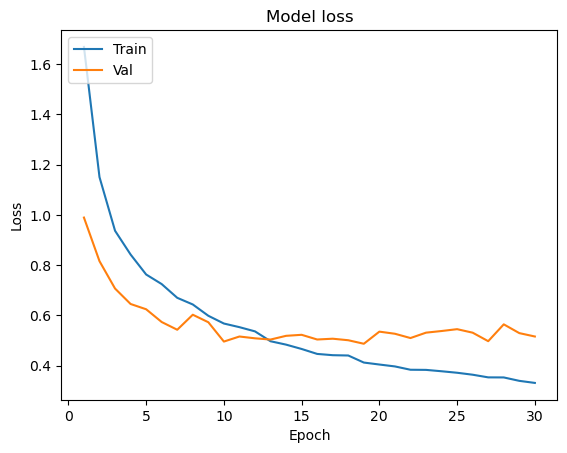

In [ ]:
plot_learningCurve(history,30)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# y_pred = model.predict_classes(X_test)
predict_y = model.predict(X_test) 
y_pred = np.argmax(predict_y,axis=1)

52/52 [==============================] - 3s 57ms/step


(<Figure size 1600x1600 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

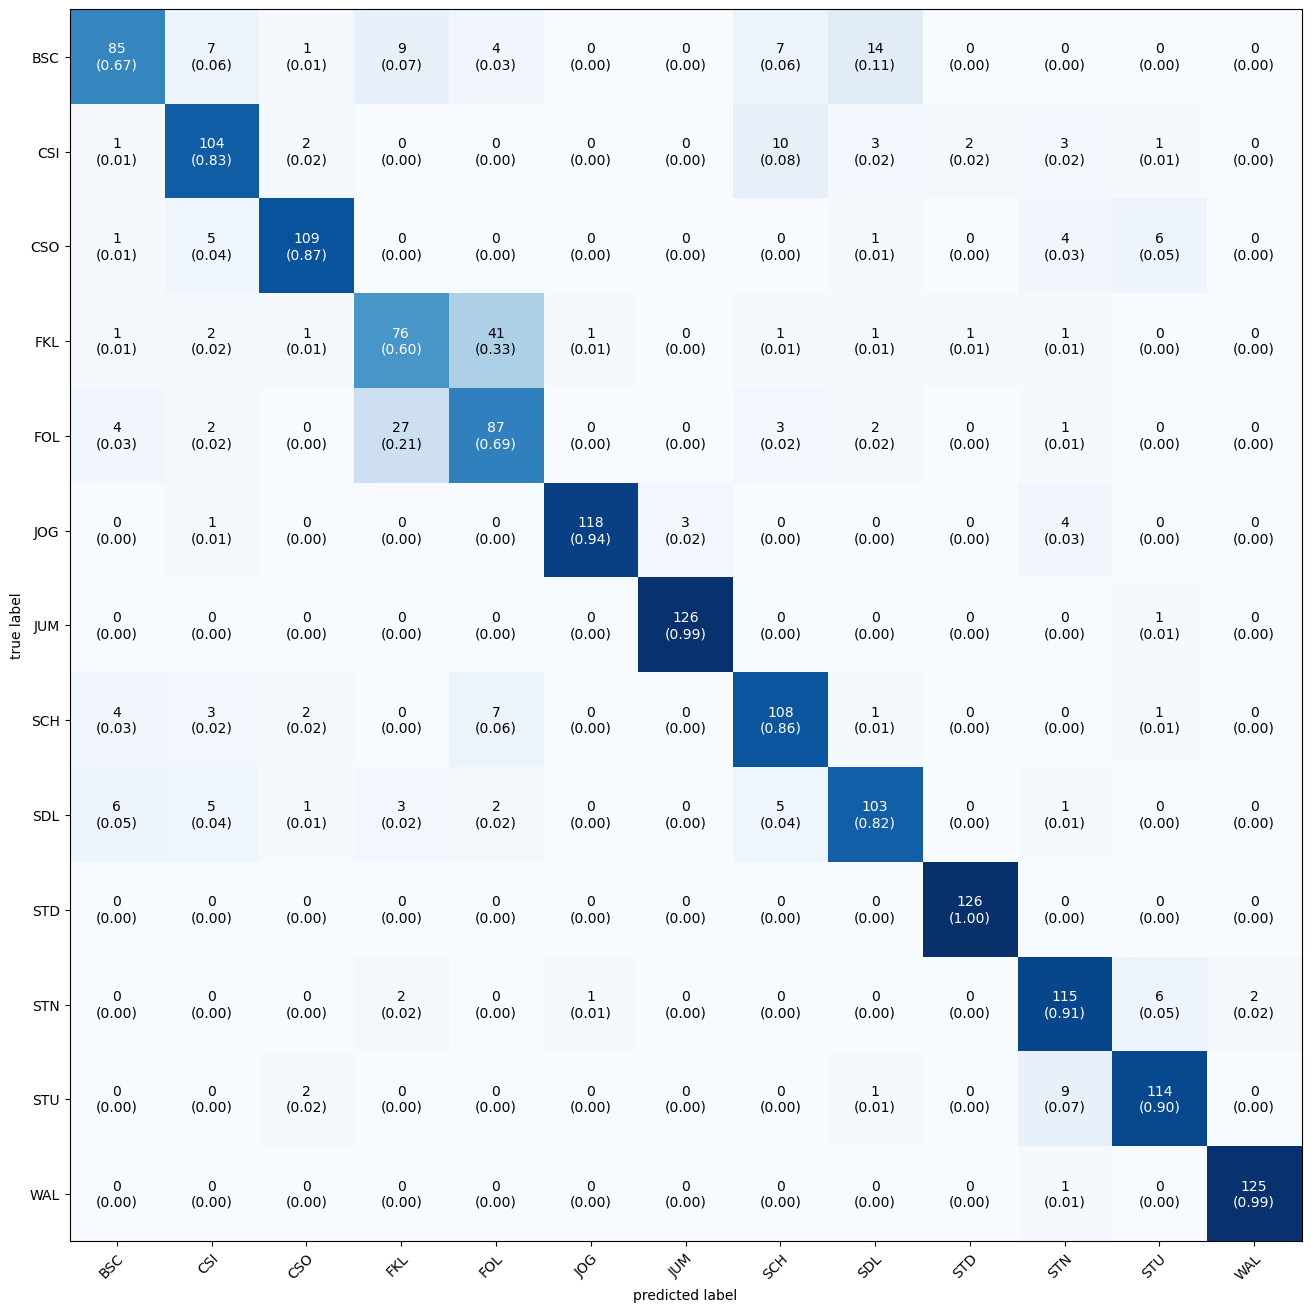

In [ ]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=lab.classes_, show_normed=True, figsize=(16,16))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 79, 8, 16)         80        
                                                                 
 dropout_30 (Dropout)        (None, 79, 8, 16)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 78, 7, 32)         2080      
                                                                 
 dropout_31 (Dropout)        (None, 78, 7, 32)         0         
                                                                 
 conv2d_26 (Conv2D)          (None, 77, 6, 32)         4128      
                                                                 
 dropout_32 (Dropout)        (None, 77, 6, 32)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 76, 5, 64)        

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

52/52 [==============================] - 3s 67ms/step - loss: 0.5159 - accuracy: 0.8512
[0.5159028172492981, 0.8512195348739624]


In [ ]:
model.save('fall detection trained model/model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('fall detection trained model/model.h5')

In [ ]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 79, 8, 16)         80        
                                                                 
 dropout_30 (Dropout)        (None, 79, 8, 16)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 78, 7, 32)         2080      
                                                                 
 dropout_31 (Dropout)        (None, 78, 7, 32)         0         
                                                                 
 conv2d_26 (Conv2D)          (None, 77, 6, 32)         4128      
                                                                 
 dropout_32 (Dropout)        (None, 77, 6, 32)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 76, 5, 64)        

In [ ]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=tf_lite_converter.convert()
open('tfconvertedmodel.tflite','wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpynxjx9bq/assets


INFO:tensorflow:Assets written to: /tmp/tmpynxjx9bq/assets
2023-05-16 01:55:48.342250: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-05-16 01:55:48.343108: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-05-16 01:55:48.365056: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpynxjx9bq
2023-05-16 01:55:48.371236: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-16 01:55:48.371729: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpynxjx9bq
2023-05-16 01:55:48.378903: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-05-16 01:55:48.388129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is n

6291864

In [ ]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# vaex_df=vaex.open('ourDS.csv')
# df = vaex_df.drop(['testId', 'sampleNo']).copy()
# df['label'].value_counts()
# array_label=df['label'].to_numpy()
# lab = LabelEncoder()
# label_En = lab.fit_transform(array_label)

# df_label=pd.DataFrame(label_En,columns=['output'])

# df_En = vaex.from_pandas(df_label)# converting pandas to vaex to combine with original data which already in vaex
# #df_out = balanced_data.concat(df_En)
# df_out = vaex.concat([df, df_En])

# X = df[['acc_x', 'acc_y', 'acc_z','gyro_x','gyro_y','gyro_z','azimuth','pitch','roll']]
# y = df_En

# from tensorflow.keras.models import load_model
# new_model=load_model('fall detection trained model/model.h5')
# predict_y = new_model.predict(X) 
# y_pred = np.argmax(predict_y,axis=1)

# accuracy = model.evaluate(X, y)
# print(accuracy)

# TESTAR MODELO
vaex_test=vaex.open('ourDS.csv')
df = vaex_test.drop(['testId', 'sampleNo']).copy()

STD = df[df['label']=='STD'].head(190).copy()
WAL = df[df['label']=='WAL'].head(190).copy()
JOG = df[df['label']=='JOG'].head(190).copy()
JUM = df[df['label']=='JUM'].head(190).copy()
FKL = df[df['label']=='FKL'].head(190).copy()
BSC = df[df['label']=='BSC'].head(190).copy()
FOL = df[df['label']=='FOL'].head(190).copy()
SDL = df[df['label']=='SDL'].head(190).copy()
STN = df[df['label']=='STN'].head(190).copy()
STU = df[df['label']=='STU'].head(190).copy()
SCH = df[df['label']=='SCH'].head(190).copy()
# CSI = df[df['label']=='CSI'].copy()
# CSO = df[df['label']=='CSO'].head(190).copy()



balanced_data = STD.concat (WAL)
act=[JOG, JUM, FKL, BSC, FOL, SDL, STN, STU, SCH]
for i in act:
    balanced_data=balanced_data.concat(i)
balanced_data

array_label=balanced_data['label'].to_numpy()
lab = LabelEncoder()
label_En = lab.fit_transform(array_label)
df_label=pd.DataFrame(label_En,columns=['output'])
df_En = vaex.from_pandas(df_label)

X = balanced_data[['acc_x', 'acc_y', 'acc_z','gyro_x','gyro_y','gyro_z','azimuth','pitch','roll']]

y = df_En


X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['acc_x', 'acc_y', 'acc_z','gyro_x','gyro_y','gyro_z','azimuth','pitch','roll'])
scaled_X['label'] = y.values
#scaled_X = vaex.from_pandas(scaled_X)


scaled_X.head()

X, y = get_frames(scaled_X, frame_size, hop_size)
X.shape, y.shape



((51, 80, 9), (51,))

In [ ]:
X = X.reshape(51, 80, 9, 1)
predict_y = model.predict(X) 
y_pred = np.argmax(predict_y,axis=1)
accuracy = model.evaluate(X, y)
print(accuracy)

2/2 [==============================] - 0s 91ms/step - loss: 16.7691 - accuracy: 0.0392
[16.76911735534668, 0.03921568766236305]
